## Simple example of variational inference

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import warnings
from tensorflow_probability import layers, distributions

/home/maxpichler/miniconda3/envs/r-sjsdm/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


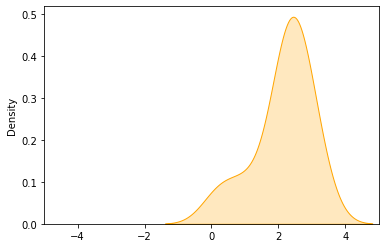

In [3]:
X = np.random.normal(2, 1.0, size=10)
XT = tf.constant(X, dtype="float32")
plt.xlim(-5, 5)
sn.distplot(X, color="orange", hist=False, kde = True, kde_kws = {'shade': True, 'linewidth': 1})
plt.show()

In [4]:
with tf.device("CPU"):
    Vars = tf.Variable([0.0,0.0, 1.0, 1.0], dtype=tf.float32)
    prior_mu = tfp.distributions.Normal(0.0, 10.0)
    prior_sd = tfp.distributions.Normal(0.0, 10.0)

    opt = tf.keras.optimizers.Adamax(learning_rate=0.1)

    for _ in range(100):
        with tf.GradientTape() as tape:
            posterior_mu = tfp.distributions.Normal(Vars[0], tf.math.softplus(Vars[2]))
            posterior_sd = tfp.distributions.Normal(Vars[1], tf.math.softplus(Vars[3]))
            mu = tf.reduce_mean(posterior_mu.sample(20))
            sd = tf.reduce_mean(posterior_sd.sample(20))
            ll= -tf.reduce_mean(tfp.distributions.Normal(mu, tf.math.softplus(sd)).log_prob(XT))
            ll += tfp.distributions.kl_divergence(posterior_mu, prior_mu)/XT.shape[0]
            ll += tfp.distributions.kl_divergence(posterior_sd, prior_sd)/XT.shape[0]
            #tf.print(ll)
        grads = tape.gradient(ll, Vars)
        _ = opt.apply_gradients(zip([grads], [Vars]))

Mean: 2.1377124786376953
Sd: 0.8783350586891174


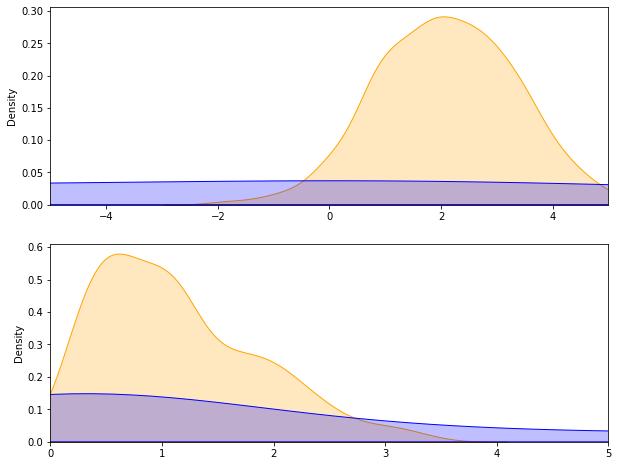

In [5]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.xlim(-5, 5)
sn.distplot(posterior_mu.sample(500), color="orange", hist=False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
sn.distplot(prior_mu.sample(500), color="blue", hist=False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})

plt.subplot(2, 1, 2)
plt.xlim(0, 5)
sn.distplot(tf.math.softplus(posterior_sd.sample(500)), color="orange", hist=False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})
sn.distplot(tf.math.softplus(prior_sd.sample(500)), color="blue", hist=False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1})

print(f'Mean: {tf.reduce_mean(posterior_mu.sample(100))}')
print(f'Sd: {tf.math.softplus(tf.reduce_mean(posterior_sd.sample(100)))}')
plt.show()